In [1]:
import matplotlib.pyplot as plt
import numpy as np

[[ 3.   -1.5   0.75 -0.75  0.75 -0.75  0.75 -0.75  0.75 -0.75  0.75 -0.75
   0.75 -0.75  0.75 -0.75  0.75 -0.75  0.75 -0.75]
 [ 3.   -0.5   1.25  0.75  1.25  0.75  1.25  0.75  1.25  0.75  1.25  0.75
   1.25  0.75  1.25  0.75  1.25  0.75  1.25  0.75]
 [13.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]]


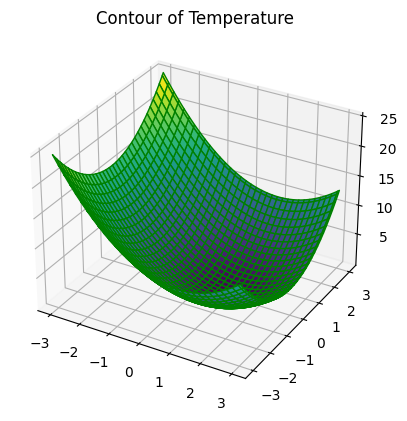

In [23]:
def main():
    def f(x, y): return x**2 + (y-1)**2

    def grad_f(x, y, h=0.1): return [(f(x + h, y) - f(x - h, y))/(2*h), (f(x, y + h) - f(x, y - h))/(2*h)]

    def Iter(f, grad_f, Bound, N): 
        z = np.zeros((3, N))
        z[:,0] = [Bound, Bound, f(Bound, Bound)]
        for i in range(1, N):
            x, y = -grad_f(z[0, i-1], z[1, i-1])[0], -grad_f(z[0, i-1], z[1, i-1])[1]
            a, b = z[0, i - 1] + x, z[1, i - 1] + y
            while f(a, b) > f(z[0, i-1], z[1, i-1]):
                a = a/2
                b = b/2
            
            z[0, i] = a
            z[1, i] = b
        
        return z

    h = 0.01
    colorinterpolation = 50
    colourMap = plt.cm.jet

    x, y = np.linspace(-3, 3, int(1/h) + 1), np.linspace(-3, 3, int(1/h) + 1)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    print(Iter(f, grad_f, 3, 20))

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='green')
    ax.set_title('Contour of Temperature')
    plt.show()

main()

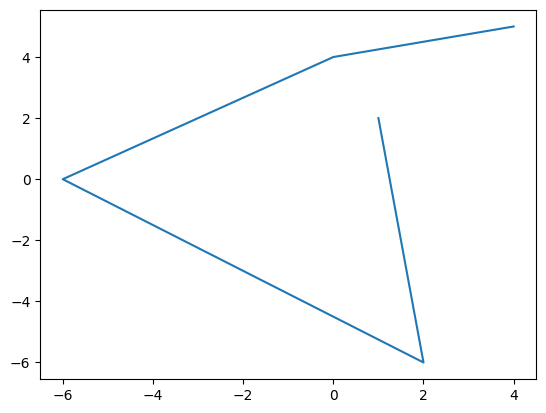

In [30]:
import matplotlib.pyplot as plt
 
plt.plot([1, 2, -6, 0, 4], [2, -6, 0, 4, 5])
plt.show()

[[ 3.00000000e+00 -5.85937500e-03  1.14440918e-05 -2.23517418e-08
   4.36557453e-11 -8.52649115e-14  1.66967135e-16 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 3.00000000e+00 -3.90625000e-03  1.96075439e-03  1.94929540e-03
   1.94931778e-03  1.94931774e-03  1.94931774e-03  1.99610136e+00
  -1.94551048e-03  2.00389102e+00]
 [ 1.30000000e+01  1.00786209e+00  9.96082336e-01  9.96105209e-01
   9.96105164e-01  9.96105164e-01  9.96105164e-01  9.92217928e-01
   1.00389481e+00  1.00779718e+00]]


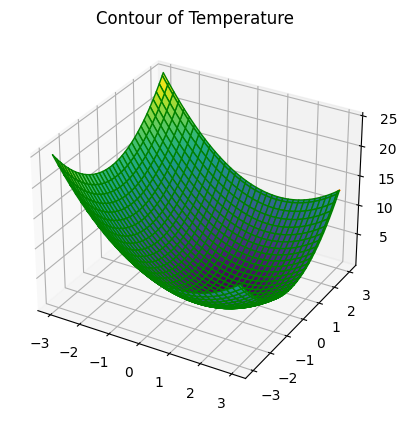

In [38]:
def main():
    def f(x, y): return x**2 + (y-1)**2

    def grad_f(x, y, h=0.1): return [(f(x + h, y) - f(x - h, y))/(2*h), (f(x, y + h) - f(x, y - h))/(2*h)]

    def Iter(f, grad_f, Bound, N): 
        z = np.zeros((3, N))
        z[:,0] = [Bound, Bound, f(Bound, Bound)]
        for i in range(1, N):
            x, y = -grad_f(z[0, i-1], z[1, i-1])[0], -grad_f(z[0, i-1], z[1, i-1])[1]
            a, b = z[0, i - 1] + x, z[1, i - 1] + y
            iter = 0
            while f(a, b) > f(z[0, i-1], z[1, i-1]) and iter < 10:
                x = x/2
                y = y/2
                iter = iter + 1
            
            z[0, i] = x
            z[1, i] = y
            z[2, i] = f(x, y)
        
        return z

    h = 0.01
    N = 10
    colorinterpolation = 50
    colourMap = plt.cm.jet

    x, y = np.linspace(-3, 3, int(1/h) + 1), np.linspace(-3, 3, int(1/h) + 1)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    print(Iter(f, grad_f, 3, N))

    ax = plt.axes(projection='3d')
    ax.plot_surface(Y, X, Z, cmap='viridis', edgecolor='green')
    ax.set_title('Contour of Temperature')
    ax.plot(Iter(f, grad_f, 3, N)[0], Iter(f, grad_f, 3, N)[1], Iter(f, grad_f, 3, N)[2])
    plt.show()

main()